# Statistical Learning

## The Data

The Advertising data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

**Goal**

Our goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets.

## Load and process data

In [1]:
import pandas as pd

adv_data = pd.read_csv('../data/Advertising.csv', index_col=0)
print('Shape of dataset: ',adv_data.shape)
print('Preview:')
adv_data.head()

Shape of dataset:  (200, 4)
Preview:


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Convert dataset into long-format for plotting

In [2]:
adv_data_long = pd.melt(adv_data,id_vars=['sales'], value_name='ad_budget', var_name='method')
adv_data_long.head()

,sales,method,ad_budget
0,22.1,TV,230.1
1,10.4,TV,44.5
2,9.3,TV,17.2
3,18.5,TV,151.5
4,12.9,TV,180.8


### Display Sales vs Advertisement Budget

The plot displays sales, in thousands of units, as a function of TV, radio, and newspaper budgets, in thousands of dollars, for 200 different markets. In each plot we show the simple least squares fit of sales to that variable, as described in Chapter 3. 

In other words, each blue line represents a simple model that can be used to predict sales using TV, radio, and newspaper, respectively.

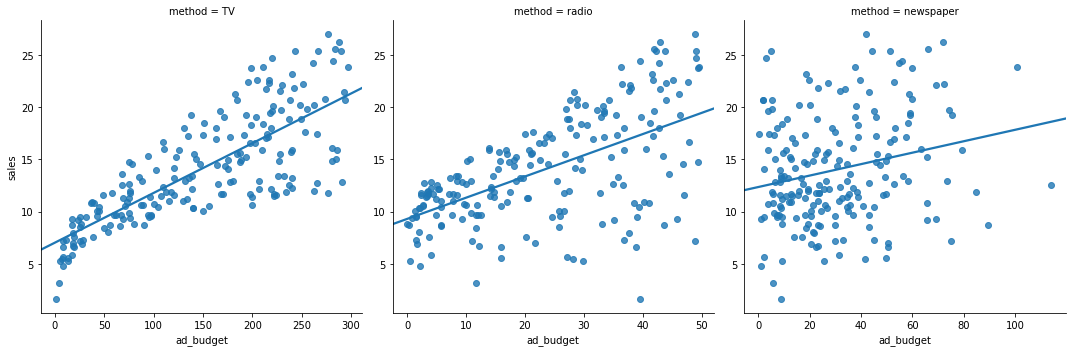

In [3]:
import seaborn as sns
plot = sns.lmplot(data=adv_data_long, x='ad_budget',y='sales', col='method', 
                  sharex=False, sharey=False, fit_reg=True, ci=None)

### Problem Formulating 

In this setting, the advertising budgets are _input variables_ while sales is an _output variable_. 

The input variables are typically denoted using the symbol **X**, with a subscript to distinguish them. So **X1** might be the TV budget, **X2** the radio budget, and **X3** the newspaper budget. The inputs go by different names, such as _predictors_, _independent variables_, _features_, or sometimes just _variables_. 

The output variable—in this case, sales—is often called the response or _dependent variable_, and is typically denoted using the symbol **Y**. Throughout this book, we will use all of these terms interchangeably.

### General form expression

More generally, suppose that we observe a quantitative response $Y$ and p different predictors, $X_1, X_2, . . . , X_p$. We assume that there is some relationship between $Y$ and $X = (X_1,X_2,...,X_p)$, which can be written in the very general form:

$$
Y = f(X) + \epsilon
$$


Here f is some fixed but unknown function of $X_1, . . . , X_p$, and $\epsilon$ is a random error term, which is independent of $X$ and has mean zero. In this formulation, $f$ represents the _systematic information that $X$ provides about $Y$_.

## Why Estimate $f$ ?

There are two main reasons:
1. Prediction - given $X$, what is $Y$?
2. Inference - how does $Y$ change with $X$?


### 1. Prediction

Often we have some input variables $X$ and associated outputs $Y$, but for some inputs the output is not known. In this context, we could use $X$ to predict $Y$. We can write it as:

$$
\hat{Y} = \hat{f}(X)
$$

Where the ^ sign indicates and estimate of the real values. 


**Errors**

The accuracy of Y as a prediction for Y depends on two quantities, which we will call the **reducible error** and the **irreducible error**.

* reducible error - Improving $f$ to better represent $Y$
* irreducible error - Errors not possible to predict --> $\epsilon$


### 2. Inference

Instead of predicting the values of $Y$ given some $X$, we are often more interested in understanding how $Y$ changes as $X$ changes. Specifically, we may be interested in the following questions:

* Which predictors are associated with the response? 
* What is the relationship between the response and each predictor?
* Can the relationship between $Y$ and each predictor be adequately summarized using a linear equation, or is the relationship more complicated? 


### Example

For example, in a real estate setting, one may seek to relate values of homes to inputs such as crime rate, zoning, distance from a river, air quality, schools, income level of community, size of houses, and so forth. In this case one might be interested in how the individual input variables affect the prices—that is, _how much extra will a house be worth if it has a view of the river_? This is an **inference** problem. 

Alternatively, one may simply be interested in predicting the value of a home given its characteristics: is this house under- or over-valued? This is a **prediction** problem.


### Choosing your battles

Depending on whether our ultimate goal is prediction, inference, or a combination of the two, different methods for estimating $f$ may be appropriate.

For example, _linear models_ allow for relatively simple and interpretable inference, but may not yield as accurate predictions as some other approaches. In contrast, some of the highly non-linear approaches that we discuss in the later chapters of this book can potentially provide quite accu- rate predictions for $Y$ , but this comes at the expense of a less interpretable model for which inference is more challenging.

## How do we estimate $f$ ? 

Although the content and the context of the problems may vary, when approach a problem from a statistical learning perspective, the problems will generally share some characteristics. 


### Training Data

We will always assume that we have observed a set of $n$ different data points. These observations are called the _training data_ because we will use these observations to train, or teach, our method how to estimate $f$.


Broadly speaking, most statistical learning methods for this task can be characterized as either _parametric_ or _non-parametric_.


### Parametric Methods

Parametric methods take a two-step approach:

1. Select/Assume a model for representing $f$. 
    * For example we can assume a linear model, which would take the form:  $f(X) = \beta_0 + \beta_1 X_1 + \ldots \beta_p X_p$
2. Use the training data to _train_ the model.
    * Now the model parameters ($\beta_0, \beta_1, \ldots \beta_p$) are estimated using the training data. 
    
    
**Advantage**: Only need to estimate $p+1$ parameters.

**Disadvantage**: Whichever model we choose, it will usually not match the true $f$. 

### Non-parametric Methods

Non-parametric methods do not make explicit assumptions about the functional form of $f$.

**Advantage**: Potential to accurately fit a wider range of possible shapes for $f$.

**Disadvantage**: Requires many more observations than parametric models for estimating $f$.

## Measuring Model Performance

There are many ways to measure model performance. In the regression setting, the most commonly-used measure is the _mean squared error_ (MSE):


$$
MSE = \frac{1}{n} \sum_{i=1}^n((y_i - \hat{f}(x_i))^2
$$

### Bias-Variance Decomposition

The expected test MSE, for a given value $x_0$, can always be decomposed into the sum of three fundamental quantities:

1. The _variance_ of $\hat{f}(x_0)$
2. The squared _bias_ of $\hat{f}(x_0)$
3. The variance of the error terms $\epsilon$

Which can be written as:

$$
E(y_0 - \hat{f}(x_0))^2 = \text{Var}(\hat{f}(x_0)) + [\text{Bias}(\hat{f}(x_0))]^2 + \text{Var}(\epsilon)
$$

Where $E(y_0 - \hat{f}(x_0))^2$ defines the _expected test MSE_, and refers to the average test MSE that we would obtain if we repeatedly estimated $f$ using a large number of training sets, and tested each at $x_0$. 


Hence, we see that the expected test MSE can never lie below $\text{Var}(\epsilon)$, the **irreducible error**.

### Bias Variance Trade-off

**Variance** refers to the amount by which $\hat{f}$ would change if we estimated it using a different training data set. If a method has high variance then small changes in the training data can result in large changes in $f$. 

> In general, more flexible statistical methods have higher variance.


**Bias** refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much simpler model. 

>Generally, more flexible methods result in less bias.

![../figures/Chapter2/2.12.pdf](../figures/Chapter2/2.12.pdf.png)

In this figure, we see the _mean squared error_ (MSE) plotted along with the bias and variance of a model as the model flexibility increases for three different models. The dotted line shows the point where MSE is at a minimum. 


**Note:** _This is not an analysis you can typically do for real datasets as we have to know about how the data set was generated_